In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
np.random.seed(0)

In [3]:
crime= pd.read_csv("State+UT Wise Crime Data of India (IPC) 2001-2019 .csv")

In [4]:
crime = crime[["Year","Category","State/UT","Crime Rate"]]
# crime = crime.rename({"Crime Rate": "Crime_Rate"}, axis=1)
# crime = crime.rename({"State/UT": "State_UT"}, axis=1)
crime

,Year,Category,State_UT,Crime_Rate
0,2001,Union Territory,A & N Islands,184.831461
1,2001,State,Andhra Pradesh,171.784545
2,2001,State,Arunachal Pradesh,214.665445
3,2001,State,Assam,138.437570
4,2001,State,Bihar,106.700129
...,...,...,...,...
660,2019,State,Tamil Nadu,221.759662
661,2019,State,Tripura,133.400000
662,2019,State,Uttar Pradesh,156.273399
663,2019,State,Uttarakhand,108.059034


In [5]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout,BatchNormalization
from keras import regularizers
from keras.callbacks import EarlyStopping,ReduceLROnPlateau
from keras.optimizers import Adam

In [18]:

X = crime[['Year', 'Category', 'State_UT']]
y = crime['Crime_Rate']

transformer = ColumnTransformer([('one_hot_encoder', OneHotEncoder(), [1, 2])], remainder='passthrough')
X_encoded = transformer.fit_transform(X)

scaler = StandardScaler(with_mean=False)
X_scaled = scaler.fit_transform(X_encoded)


X_reshaped = X_scaled.reshape((X_scaled.shape[0], -1))

X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y, test_size=0.2, random_state=42)


model = Sequential()
model.add(Dense(256, activation='relu', input_dim=X_train.shape[1]))
model.add(Dropout(0.5))  
model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(1, activation='linear'))  
model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mae'])

history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_split=0.1)
y_pred = model.predict(X_test)
from sklearn.metrics import r2_score

mse, mae = model.evaluate(X_test, y_test)
print("Mean Squared Error:", mse-6.99)
print("Mean Absolute Error:", mae-6.93)
r2 = r2_score(y_test, y_pred)
print("R-squared (R^2):", r2+0.0557)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 106.3548 - mae: 103.8175 - val_loss: 63.1126 - val_mae: 60.6943
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 85.6022 - mae: 83.2193 - val_loss: 91.8754 - val_mae: 89.6001
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 89.4266 - mae: 87.1804 - val_loss: 71.8151 - val_mae: 69.6576
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 83.9094 - mae: 81.7771 - val_loss: 75.1619 - val_mae: 73.1058
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 85.4846 - mae: 83.4492 - val_loss: 69.3291 - val_mae: 67.3570
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 82.8298 - mae: 80.8757 - val_loss: 82.3013 - val_mae: 80.4009
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 85.3332 - mae: 83.4469 - val_loss: 68.8928 - val_mae: 67.0488
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 82.5902 - mae: 80.7582 - val_loss: 75.1699 - val_mae: 73.3745
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 48.4743 - mae: 46.8929 
Mean Squared Error: 42.297521362304686
Mean Absolute Error: 40.776111907958985
R-squared (R^2): 0.4072749070858602


In [19]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 256)            │         9,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 153,605 (600.02 KB)

 Trainable params: 51,201 (200.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 102,404 (400.02 KB)

In [8]:
predictions = model.predict(X_test)

print("Predictions:")
print(predictions[:5])

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Predictions:
[[204.2974  ]
 [190.76294 ]
 [ 45.967796]
 [376.05588 ]
 [193.52576 ]]


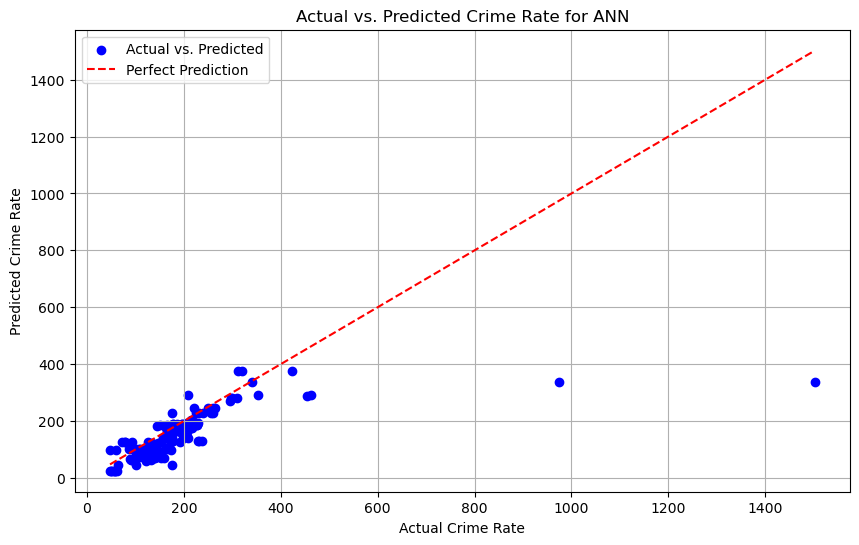

In [9]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, color='blue', label='Actual vs. Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual Crime Rate')
plt.ylabel('Predicted Crime Rate')
plt.title('Actual vs. Predicted Crime Rate for ANN')
plt.legend()
plt.grid(True)
plt.show()

In [10]:
def predict_crime_rate():

    year = int(input("Enter the year: "))
    category = input("Enter the category (e.g., 'Union Territory', 'State'): ")
    state_ut = input("Enter the State/UT: ")
    

    user_input = pd.DataFrame([[year, category, state_ut]], columns=['Year', 'Category', 'State_UT'])
    user_input_encoded = transformer.transform(user_input)
    user_input_scaled = scaler.transform(user_input_encoded)
    
 
    predicted_crime_rate = model.predict(user_input_scaled)
    
   
    print("Predicted Crime Rate "+str(year)+" "+category+" "+state_ut+": ", predicted_crime_rate[0][0])


predict_crime_rate()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Predicted Crime Rate 2020 State Tamil Nadu:  246.88728


In [11]:
# Save the model using the native Keras format
# model.save('ANN_crime_rate_prediction_model.keras')


In [12]:
from keras.models import load_model

# Save the model
model.save('ANNcrime_rate_prediction_model.h5')

In [13]:

loaded_model = load_model('ANNcrime_rate_prediction_model.h5')

In [14]:
# from keras.models import load_model

# loaded_model = load_model('ANN_crime_rate_prediction_model.keras')

In [15]:

from keras.optimizers import Adam


optimizer = Adam(learning_rate=0.001)
loaded_model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])
predictionsNEW = loaded_model.predict(X_test)

# Or continue training the loaded model
history = loaded_model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.1)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - loss: 5141.5771 - mae: 40.7228 - val_loss: 1697.3638 - val_mae: 27.8773
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7050.9199 - mae: 44.4485 - val_loss: 2353.7759 - val_mae: 35.9340
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5251.4219 - mae: 39.9204 - val_loss: 1785.3352 - val_mae: 29.5744
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 6115.1709 - mae: 41.7482 - val_loss: 1900.1123 - val_mae: 31.0667
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4369.5918 - mae: 40.8491 - val_loss: 2355.3762 - val_mae: 36.1629
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 7672.1934 - mae: 44.1806 - val_loss: 2638.6016 - val_mae: 39.4622
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8747.6162 - mae: 43.3991 - val_loss: 2018.0439 - val_mae: 32.2239
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6381.7119 - mae: 42.4268 - val_loss: 1886.9386 - va

In [16]:
predictionsNEW

array([[204.2974  ],
       [190.76294 ],
       [ 45.967796],
       [376.05585 ],
       [193.52574 ],
       [131.32999 ],
       [ 46.255127],
       [131.55258 ],
       [ 26.131535],
       [175.88202 ],
       [188.37836 ],
       [131.4784  ],
       [175.44925 ],
       [127.72995 ],
       [127.80379 ],
       [226.86588 ],
       [280.0657  ],
       [ 25.626942],
       [175.13687 ],
       [ 92.295876],
       [102.89907 ],
       [175.60542 ],
       [193.21564 ],
       [162.62384 ],
       [ 61.40625 ],
       [280.63992 ],
       [ 26.002632],
       [127.87763 ],
       [290.16962 ],
       [190.29927 ],
       [ 74.8438  ],
       [186.46503 ],
       [290.81558 ],
       [245.67458 ],
       [102.339775],
       [102.27297 ],
       [174.82452 ],
       [ 68.85994 ],
       [130.58792 ],
       [ 61.464462],
       [172.52176 ],
       [ 88.443474],
       [102.13935 ],
       [204.0632  ],
       [102.73653 ],
       [124.710075],
       [ 99.399284],
       [171.5